<a href="https://colab.research.google.com/github/CaptainAshis/Time_Series_Python-SQL/blob/master/Prophet_TS_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/'My Drive'/amex/Prophet

[Errno 2] No such file or directory: 'drive/My Drive/amex/Prophet'
/content/drive/My Drive/amex/Prophet


In [0]:
df=pd.read_csv('beer.csv')


In [0]:
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
DATE              328 non-null object
S4248SM144NCEN    328 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [0]:
df.columns=['ds','y']

In [0]:
df['ds']=pd.to_datetime(df['ds'])

In [0]:
m=Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Placeholder to hold our future dataframes

In [0]:
# 2yrs predictions
future=m.make_future_dataframe(periods=24,freq='MS')
future.tail()


,ds
347,2020-12-01
348,2021-01-01
349,2021-02-01
350,2021-03-01
351,2021-04-01


In [0]:
df.tail()

,ds,y
323,2018-12-01,15504
324,2019-01-01,10768
325,2019-02-01,11134
326,2019-03-01,12653
327,2019-04-01,13258


In [0]:
len(df),len(future)

(328, 352)

In [0]:
forecast=m.predict(future)

In [0]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,4032.271056,1605.281926,2756.820737,4032.271056,4032.271056,-1854.376374,-1854.376374,-1854.376374,-1854.376374,-1854.376374,-1854.376374,0.0,0.0,0.0,2177.894682
1,1992-02-01,4044.769968,2160.364317,3348.670256,4044.769968,4044.769968,-1282.017927,-1282.017927,-1282.017927,-1282.017927,-1282.017927,-1282.017927,0.0,0.0,0.0,2762.752040
2,1992-03-01,4056.462498,3259.986681,4497.302531,4056.462498,4056.462498,-150.604496,-150.604496,-150.604496,-150.604496,-150.604496,-150.604496,0.0,0.0,0.0,3905.858001
3,1992-04-01,4068.961409,3233.610964,4479.100625,4068.961409,4068.961409,-227.279048,-227.279048,-227.279048,-227.279048,-227.279048,-227.279048,0.0,0.0,0.0,3841.682361
4,1992-05-01,4081.057130,4008.373097,5213.250162,4081.057130,4081.057130,578.489780,578.489780,578.489780,578.489780,578.489780,578.489780,0.0,0.0,0.0,4659.546910


In [0]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
340,2020-05-01,13651.599189,14856.034100,14259.067652
341,2020-06-01,13949.986127,15114.438575,14514.623084
342,2020-07-01,13036.779635,14256.439486,13652.741026
343,2020-08-01,13620.536282,14830.959506,14210.446456
344,2020-09-01,12967.562701,14284.523816,13644.040287
345,2020-10-01,13485.204411,14701.951581,14088.376013
346,2020-11-01,13635.426402,14781.878952,14212.371485
347,2020-12-01,14571.349743,15790.423479,15210.012252
348,2021-01-01,11531.239124,12745.489719,12127.030769
349,2021-02-01,11977.810719,13157.896760,12570.376586


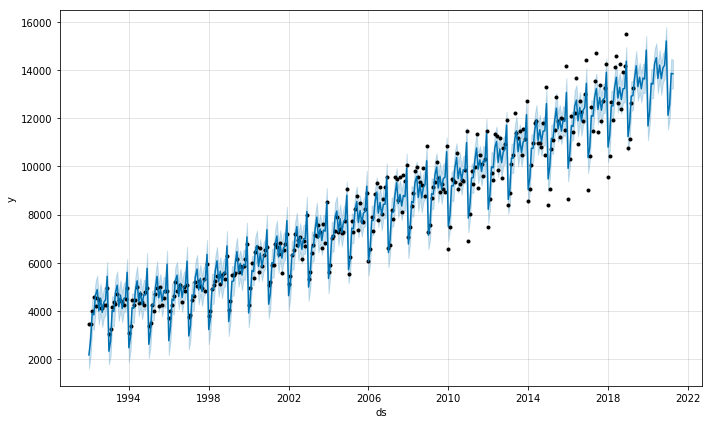

In [0]:
m.plot(forecast);

In [0]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# m.plot(forecast)
# plt.xlim('2014-01-01','2021-04-01')

In [0]:
# forecast.plot(x='ds',y='yhat',figsize=(8,10))

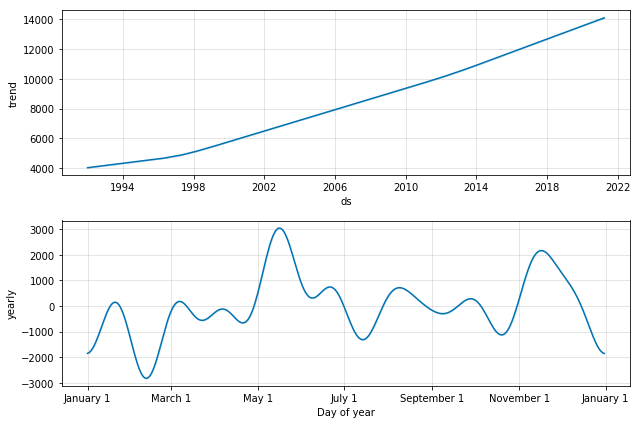

In [0]:
m.plot_components(forecast);